**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercices in chapter 3._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

# Notes: You must have created the directory:
#    ./images/classification
# where all of the results will be stored.
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

In [2]:
# Notes: Requires internet connection to fetch the dataset.
#        Need to wait a little bit for the data to arrive.
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
# Notes: 
#   X: Each row is an input, binary digit image.
#   y: Each entry is the digit classification.
import math as math
X, y = mnist["data"], mnist["target"]
print("All images:   X shape =", X.shape, ", y shape = ", y.shape)
print("First image: X[0].shape = ", X[0].size, 
      "=", math.sqrt(X[0].size), "x", math.sqrt(X[0].size))
print("First image classification: y[0] = ", y[0])
print("First image:   X[0] = \n", X[0], "\n")

All images:   X shape = (70000, 784) , y shape =  (70000,)
First image: X[0].shape =  784 = 28.0 x 28.0
First image classification: y[0] =  0.0
First image:   X[0] = 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 

Saving figure some_digit_plot


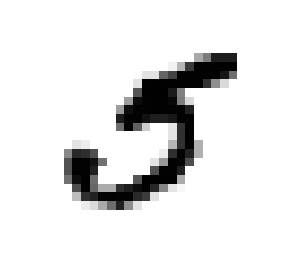

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [6]:
# Notes:
#  Nice function for plotting 10 (default) images per row!
#  To modify it for any image, start from size=28 ...
#  **options is an optional dictionary for imshow()
#  np.concatenate(row_images, axis=1) adds an image in the same row.
#  np.concatenate(row_images, axis=0) add a full row of images.

# Notes:
#  A short demo showing how images are arranged
#  array by array:

print("Demo: Arranging images into a sequence of arrays:")
import numpy as np

instances = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
images = [instance.reshape(2,2) for instance in instances]
print(images)


# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Demo: Arranging images into a sequence of arrays:
[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]])]


Shape of example_images =  (100, 784)
Saving figure more_digits_plot


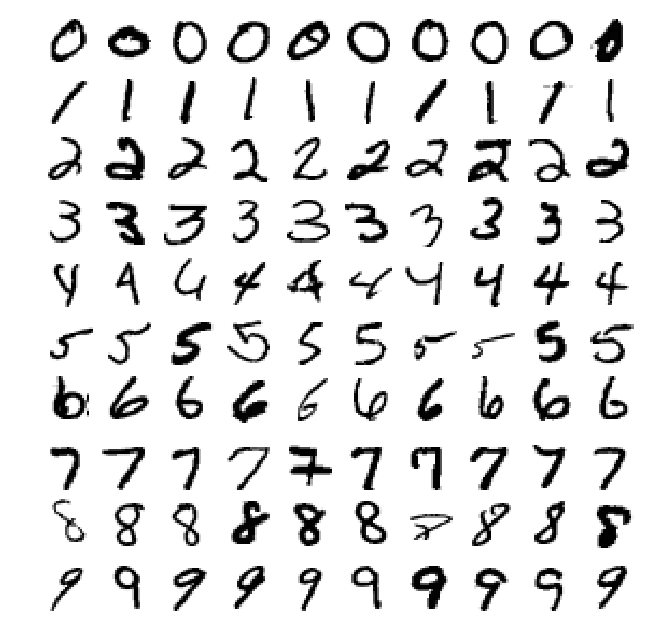

In [7]:
# Note: Create 9x9 inches
plt.figure(figsize=(9,9))

# Note: Row-wise merge:
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
print("Shape of example_images = ", example_images.shape)

plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [8]:
y[36000]

5.0

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print("Train size = ", y_train.size)
print("Test  size = ", y_test.size)

Train size =  60000
Test  size =  10000


In [10]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

In [11]:
print("Training and testing for digit=5 only:")
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print("First training sample classification = ", y_train_5[0])

Training and testing for digit=5 only:
First training sample classification =  False


In [12]:
from sklearn.linear_model import SGDClassifier

# http://scikit-learn.org/stable/modules/sgd.html
# Detailed information is given here:
#   http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# The default is a linear SVM.
print("Fast Stochastic Gradient Descent Classifier initialized for reproducibility")


print("Constructor for the classifier")
sgd_clf = SGDClassifier(random_state=42)

print("Fit the training set for digit=5")
sgd_clf.fit(X_train, y_train_5)

Fast Stochastic Gradient Descent Classifier initialized for reproducibility
Constructor for the classifier
Fit the training set for digit=5


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

Use the classifier to predict an image
True=this is 5, False=This is not 5:
5?  [ True]


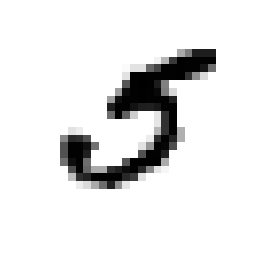

In [13]:
plot_digit(some_digit)

print("Use the classifier to predict an image")
print("True=this is 5, False=This is not 5:")
print("5? ", sgd_clf.predict([some_digit]))

In [14]:
# Three-fold cross-validation:
#    Break the data into 3 equal sets.
#    Train on 2 our of the 3.
#    Test on the remaining set.
#    Repeat for each one of the three and report metric for each set.
#
from sklearn.model_selection import cross_val_score
print("Number of samples = ", y_train_5.size, 
      ", accuracy for each 1/3rd random sample = ",
      cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy"))

Number of samples =  60000 , accuracy for each 1/3rd random sample =  [ 0.9502   0.96565  0.96495]


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

print("Stratified sampling allows us to make each fold (set)")
print("have the same distribution of 5 and non-5 images.")
skfolds = StratifiedKFold(n_splits=3, random_state=42)

# Run the three folds:
# Cross-validation algorithm:
#  Break the data into sets (=folds).
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # http://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html
    # clone is a deepcopy of the classifier parameter structure
    # Lists using [] and tuples (immutable) using ()
    clone_clf = clone(sgd_clf)
    
    # Break training set into independent training set
    # and testing set.
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    # fit the training data
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # predict the test data
    y_pred = clone_clf.predict(X_test_fold)
    
    # Compute the accuracy
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

Stratified sampling allows us to make each fold (set)
have the same distribution of 5 and non-5 images.
0.9502
0.96565
0.96495


In [16]:
# Dumb classifier that simply classifies everything as zero.
# Will give 90% accuracy since 90% are not 5s.
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [17]:
# Apply dumb classifier to show how the data are
# made up of 90% non-5.
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.909  ,  0.90715,  0.9128 ])

In [18]:
from sklearn.model_selection import cross_val_predict

# Use cross-validation for the train set
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix by comparing
# the predicted values of y_train_pred against
# the actual y_train_5 that holds the actual predictions
 
#  Explanation:
#  ------------
#  Assuming that human classification is correct here.
#  Else we can establish correctness through other means.
#
#  True     = Human ground truth and computer agree.
#  False    = Human and computer disagree. The human is right and the computer is wrong (false)
#  Positive = This is classified as what we are looking for.
#              For example, this is positive for cancer.
#  Negative = This is classified as not what we are looking for.
#  True Negative  = Humans and computer agree. There is "nothing" there. Computer is right.
#  True Positive  = Humans and computer agree. We have what we are looking for. Computer is right.
#  False Negative = Computer says negative. Humans say positive. Computer is wrong (false).
#  False Positive = Computer says positive. Humans say negative. Computer is wrong (false).
#
# A summary of what was said above is given in the following table:
#                                   Recall column for predicted
#            Computer ->    Negatives     Positives
#  Human(s) -> Negatives:  [True Neg     False Pos]
#  Human(s) -> Positives:  [False Pos     True Pos]  <- Precision row for real positives

# Required statistics
# -------------------
#    N = number of negatives
#      = True Negatives + False Positives
#    N = TN + FP
# FP: They are negative that are wrongly classified.

#    P = number of positives
#      = True positives + False negatives
#      = TP + FN
# FN: They are positives that are wrongly classified.

# How sensitive are we to the positives?
# Can we find all of them?
#
# Recall = Sensitivity
#    = True Positive Rate 
#    = TPR
#    = TP / P = TP / (TP + FN)
# Note: TPR=1 if FN=0 
#       = we NEVER miss a positive.

# How precise are we?
# When we say that it is positive, are we right?
# Precision based on the actual positives and how they are missed
#     Precision = TP/(TP+FP)
# Note: Precision=1 if FP=0. 
#       = We are ALWAYS right when we call a positive.

# Similar to sensitivity, specificity 
# measures how "sensitivity for negatives":
#  Specificity = TN / N
#              = TN / (TN+FP)
# Note: Specificity=1 if FP=0.
#    = Perfect precision (=1)
#    = we are ALWAYS right when we call a positive.

# Similar to TPR, we have:
# False Positive Rate = FPR
#    = FP / N = FP / (FP + TN)
#    = 1 - Specificity
# Note: FPR=1 if FP=0.
#    = Perfect precision (=1)
#    = we are ALWAYS right when we call a positive.

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [20]:
y_train_perfect_predictions = y_train_5

In [21]:
# Ideal matrix:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [22]:
from sklearn.metrics import precision_score, recall_score

# Precision based on the actual positives and how they are missed
#     Precision = TP/(TP+FP)
precision_score(y_train_5, y_train_pred)

0.76871350203503808

In [23]:
# Precision formula from precision table
4344 / (4344 + 1307)

0.7687135020350381

In [24]:
# Recall or sensitivity based on all positive classifications by computer
#   Recall = TP/(TP+FP)
recall_score(y_train_5, y_train_pred)

0.80132816823464303

In [25]:
# Recall definition from the confusion matrix
4344 / (4344 + 1077)

0.801328168234643

In [26]:
from sklearn.metrics import f1_score

# Harmonic mean of precision and recall:
#  f1 = 2*(precision x recall)/(precision + recall)
#  f1 = 2 / (1/precision + 1/recall)  
#  When equal: mean is  2x^2/(2*x) = x  correct!
#  Gives priority to 1/small-value is large and 1/infinity=0.
f1_score(y_train_5, y_train_pred)

0.78468208092485547

In [27]:
4344 / (4344 + (1077 + 1307)/2)

0.7846820809248555

In [28]:
# The score represents the distance from the decision boundary:
#   >0 implies positive classification.
#   <0 implies negative classification.
#   =0 you can go wither way
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 161855.74572176])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [30]:
# Correctly identify the 5
y_some_digit_pred

array([ True], dtype=bool)

In [31]:
# If you raise the threshold way too high,
# you start missing some of the 5s.
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [32]:
# Compute the distance from the decision boundary for each sample.
# For this, use the method argument to overwrite the default behavior.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

# Nice precision-recall trade-off based on threshold distance:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


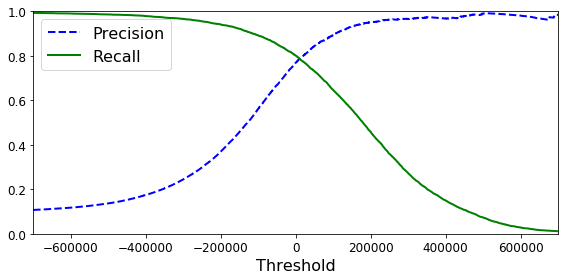

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

# Note that the bumpiness in Precision is because we cannot control
# the interaction of the actual positives with our decision.
# Thus, the precision ratio can change irregularly.
# However, for recall, the threshold reduction will move us towards negatives always.
# There is a subset relationship for the Recall that is not there for Precision.
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [35]:
# https://docs.python.org/2/library/functions.html#all
#   all() performs an "and" of all the elements.
#   any() performs an "or"
# Verify that >0 is indeed the classification rule:
(y_train_pred == (y_scores > 0)).all()

True

In [36]:
# Study the Precision-Recall curve to come up with an operating point.
# For precision about 0.9, we get a threshold of 70,000 (see above).
y_train_pred_90 = (y_scores > 70000)

In [37]:
# Precision for operating point:
precision_score(y_train_5, y_train_pred_90)

0.86592051164915484

In [38]:
# Recall for operating point:
recall_score(y_train_5, y_train_pred_90)

0.69931746910164172

Saving figure precision_vs_recall_plot


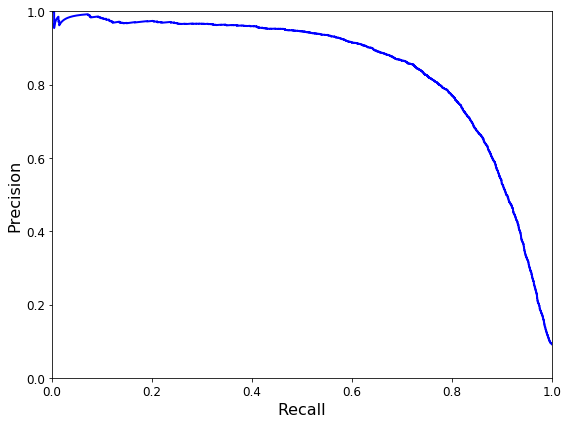

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


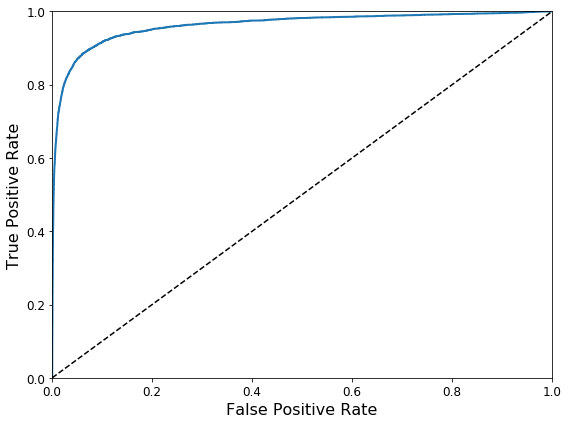

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# https://en.wikipedia.org/wiki/Sensitivity_and_specificity
# Sensitivity = Recall 
#    = True Positive Rate = TPR
#    = TP / P = TP / (TP + FN)
# False Positive Rate = FPR
#    = FP / N = FP / (FP + TN)
#    = 1 - Specificity

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

# The area under the ROC curve is a classic and preferred measurement
# that does not depend on the threshold. It is a global measure of performance.
# This is by far the most important metric in real applications.
roc_auc_score(y_train_5, y_scores)

0.96244965559671547

In [43]:
# Tree classification:
#   Reference = Chapter 8 of "An Introduction to
#               Statistical Learning with Applications in R"
#
# Tree classification uses a tree to decide the classification.
#   Each node represents a decision made by an inequality.
#   When we reach a leaf, the final decision is given.
#
# Each tree produces a True or False classification as before.
#
# Forest = collection of tree classifiers.
# Forest output = majority of tree classifier outputs.
#
# Random forest uses multiple trees generated by considering the
#   square-root of the number of total variables at each decision level.
#
# This material is also covered in Chapter 7 of your book.
# According to Breiman, they do not overfit
#    See https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

# Use the probability instead of a threshold to build a ROC curve.
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [44]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


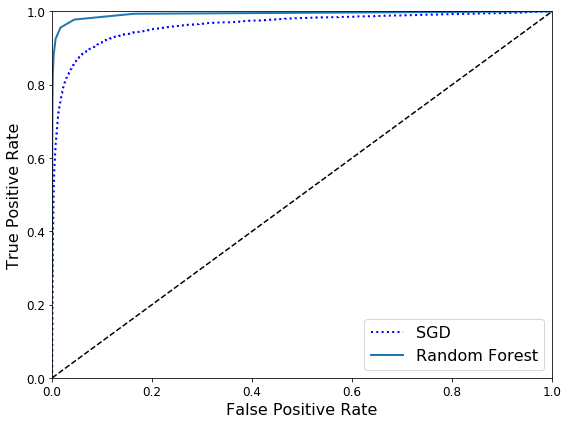

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [46]:
# The results are amazing!
roc_auc_score(y_train_5, y_scores_forest)

0.99312433660038291

In [47]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.98529734474434938

In [48]:
recall_score(y_train_5, y_train_pred_forest)

0.82826046854823832

# Multiclass classification

In [49]:
# Two approaches for classifying using multiple classes:
#  1. OvO: One versus one. 
#      Only choice for SVM. Everyone competes against everyone else.
#      The one with most of the points wins. Like Premier Leaque!
#  2. OvA: One versus all.
#      Binary classifier of one versus the rest.
#      The best one with the best score wins.
#      This is the default for binary classification.

# Run the full set with all of the possible digit classifications.
# Runs the default OvA.
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [50]:
# Combines multiple individual classifiers into one result
# based on the best score.
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [51]:
# Max score gives the classifier.
np.argmax(some_digit_scores)

5

In [52]:
# The labels for each class:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [53]:
# And the label for this class:
sgd_clf.classes_[5]

5.0

In [54]:
# Change the paradigm using OvO
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [55]:
# We have  10*9/2 = 45 classifiers.
len(ovo_clf.estimators_)

45

In [56]:
# Random forest directly provide multi-label classification.
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [57]:
# Excellent probability classification for all of the digits.
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [58]:
# Classification accuracy for each one of the three subsets.
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.84063187,  0.84899245,  0.86652998])

In [59]:
# SOS: You should have pre-processed the images!!!
# Here, apply X = (x-mean)/std for each pixel.
#  to generate a zero-mean and std=1 image.
# Results are dramatically improved.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91011798,  0.90874544,  0.906636  ])

In [60]:
# Create a nice confusion matrix of everything versus everything else:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

In [61]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


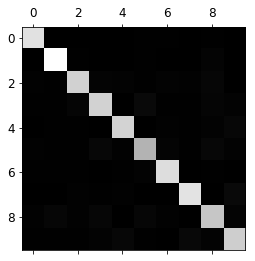

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [63]:
# Normalize the confusion matrix:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


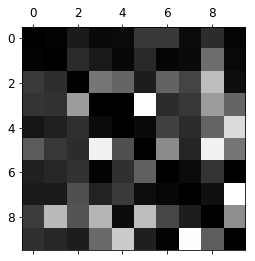

In [64]:
# Zero-out the diagonal so that we can visualize 
# the error matrix. Here, the diagonal dominated the errors!
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


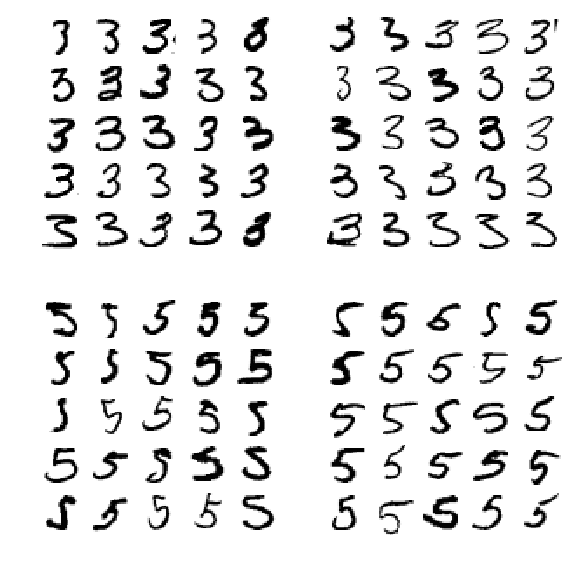

In [65]:
# Based on the brightest entries in the error matrix,
#  we want to visualize the errors for a=3 and b=5
cl_a, cl_b = 3, 5

# Human = Computer = a
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]

# (Human = a)  NOT same as  (Computer=b)
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]

# (Human = b)  NOT same as  (Computer=a)
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

# Human = Computer = b
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# Visualize 25 images for each case.
plt.figure(figsize=(8,8))

# 3 correctly
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)

# 3 classified as a 5
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)

# 5 classified as a 3
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)

# 5 correctly
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel classification

In [66]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# K nearest-neighbors
# Reference = Chapter 2 of "An Introduction to Statistical Learning with Applications in R"

# Python concept:
print("Define two classifications by concatenating columns:")
twoClasses = np.c_[
      np.array([True,  False, False]), # First  label in 1D array
      np.array([False, True,  False])] # Second label in 1D array
print(twoClasses)

from sklearn.neighbors import KNeighborsClassifier

# Classify 7, 8, and 9 as  "large"
y_train_large = (y_train >= 7)

# Classify odd numbers: 1, 3, 5, 7, and 9.
y_train_odd = (y_train % 2 == 1)

# We have two classification problems.
# Two classes associated with each digit.
y_multilabel = np.c_[y_train_large, y_train_odd]

# Constructor for empty K-nearest neighbor classifier
knn_clf = KNeighborsClassifier()

# Training using the .fit method and the multi-label y:
knn_clf.fit(X_train, y_multilabel)

Timestamp: 2017-09-25 07:26:45
Define two classifications by concatenating columns:
[[ True False]
 [False  True]
 [False False]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# Once trained, the predict can be used:
knn_clf.predict([some_digit])

Timestamp: 2017-09-25 07:27:06


array([[False,  True]], dtype=bool)

In [68]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# Apply threefold cross-validation to estimate the prediction error:
# SOS: COMMENTED the lines below because they take too long:
####y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

# Macro average = average of the two classifiers.
# Micro average = pool the data and treat the two classifiers as one.
####f1_score(y_train, y_train_knn_pred, average="macro")

Timestamp: 2017-09-25 07:27:06


# Multioutput classification

In [69]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# Random integer corruption of the input data set
# using np.random.randint(0, 100, (len(X_train), 784))
#  low=0, high=100,
#  (len(Xtrain), 784) for ALL pixels in ALL images

# Input = original image + noise
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# Ouput should be the original images:
y_train_mod = X_train
y_test_mod  = X_test

Timestamp: 2017-09-25 07:27:06


Timestamp: 2017-09-25 07:27:07
Saving figure noisy_digit_example_plot


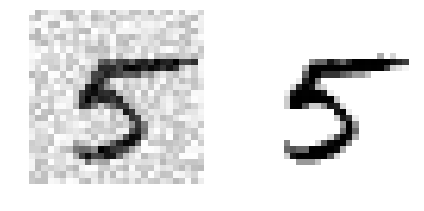

In [70]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# Demo the problem with:
#   test X and expected y for a single input.
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Timestamp: 2017-09-25 07:27:07
Saving figure cleaned_digit_example_plot


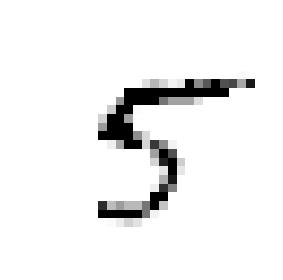

In [71]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# Demo of how denoising actually works:
#
# Testing works well since taking average of likely the same digit.
# Output = averaged nearest neighbors without the noise 
#          since it cancels out.
# A demonstration of power of having a large number of
# training examples in today's world.
# This is NOT possible for limited samples!

# Train using: X= noisy images and y=original images
knn_clf.fit(X_train_mod, y_train_mod)

# Test on the test set:
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Extra material

## Dummy (ie. random) classifier

In [72]:
# Random classifier get AUC=0.5.
# The two-class classifer is implemented using:
#    1. Generate a random number between 0 and 1.
#    2. Threshold the number to decide the class.

from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

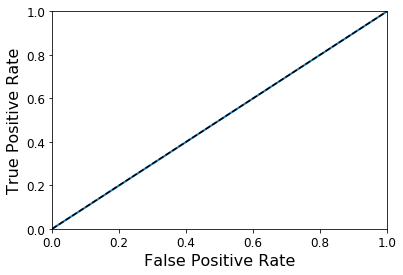

In [73]:
# Generate the worst possible curve using random classifier.
# Note:
#    If (AUC<0.5)
#    Then
#       inverse classifer has 1-AUC>0.5 which is better :-)
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN classifier

In [74]:
# Variation on KNN:
#  Weights based on distance from sample (slower)
#  K=4 which averages in case of ties
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [75]:
y_knn_pred = knn_clf.predict(X_test)

In [76]:
# Prediction based on modified K-NN is pretty-good:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.97140000000000004

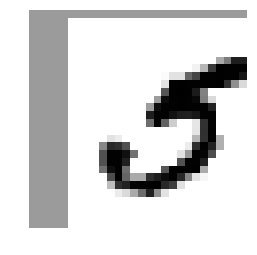

In [77]:
# Investigate invariance by shifting the image:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

# Shift by 5 pixels to the right and down by 1.
plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [79]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# Start with the original not-shifted database:
X_train_expanded = [X_train]
y_train_expanded = [y_train]

# Consider 4 shifted positions:
#  Maintain the same y for each shifted position.
#  Greatly expand the training dataset for this problem.
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

print("Note that we have a list of arrays:")
print("X_train_expanded=")
print(X_train_expanded)
print("y_train_expanded=")
print(y_train_expanded)

# np.concatenate() puts the arrays BELOW each other:
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)

# The final train set has the same number of columns.
# But it has much more images.
print("train X shape after = ", X_train_expanded.shape,
      "train y shape after = ", y_train_expanded.shape)

Timestamp: 2017-09-25 07:32:17
X_train_expanded=
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
      

In [80]:
# Keep track of long execution times using a timestamp:
import datetime
print('Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now()))

# Train over new set:
knn_clf.fit(X_train_expanded, y_train_expanded)

Timestamp: 2017-09-25 07:34:50


KeyboardInterrupt: 

In [ ]:
# Check prediction over test set:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [ ]:
# Still performing well over expanded score:
accuracy_score(y_test, y_knn_expanded_pred)

In [ ]:
# Nice demonstration of mixed probability example:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

In [ ]:
# Visualization of mixed probability example:
plot_digit(ambiguous_digit)

# Exercise solutions

**Coming soon**